In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from collections import Counter
from tensorflow.keras.applications.resnet_v2 import preprocess_input

In [4]:
root_dir = Path('/Users/deepakduggirala/Documents/ELPephant/images')

In [5]:
image_paths = [str(p) for p in sorted(root_dir.iterdir())]
image_labels = [img_path.name.split('_')[0] for img_path in sorted(root_dir.iterdir())]
N = len(list(root_dir.iterdir()))
N

2074

In [3]:
def preprocess_image(image, image_size):
    
    image = tf.image.resize(image, [image_size, image_size])
    image = tf.image.random_flip_left_right(image)
    image = preprocess_input(image)
    return image


def parse_image_function(image_path, label, image_size):
      
    image_string = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = preprocess_image(image, image_size)
    return image, label

In [24]:
params = {
    'image_size': 256,
    'batch_size': 32,
    'val_size': 0.8
}

In [25]:
AUTOTUNE   =  tf.data.experimental.AUTOTUNE
dataset    =  tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
dataset    =  dataset.shuffle(buffer_size=N, reshuffle_each_iteration=True)
train_ds   =  dataset.take(round(N * params['val_size']))
val_ds     =  dataset.skip(round(N * params['val_size']))

train_ds   =  train_ds.map(lambda x, y: parse_image_function(x, y, params['image_size']))
train_ds   =  train_ds.batch(params['batch_size']).prefetch(AUTOTUNE)

val_ds     =  val_ds.map(lambda x, y: parse_image_function(x, y, params['image_size']))
val_ds     =  val_ds.batch(params['batch_size']).prefetch(AUTOTUNE)

In [28]:
imgs, labels = next(iter(train_ds.take(1)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x2aad6ea90>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'3746'>)

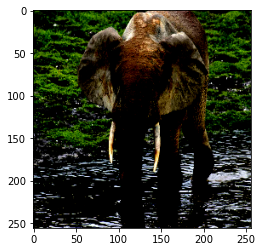

In [30]:
plt.imshow(imgs.numpy()[1]), labels[1]

In [16]:
tf.data.experimental.cardinality(dataset).numpy()

65

In [51]:
root_dir = Path('/Users/deepakduggirala/Documents/Elephants-dataset-png')
class_dirs = [d for d  in root_dir.iterdir() if d.is_dir()]

x = [(img_path, c.name) for c in class_dirs for img_path in c.iterdir() if img_path.suffix in ['.png']]
images_paths, image_labels = list(zip(*x))

In [55]:
images_paths, image_labels = list(zip(*x))

In [60]:
images_paths[1000:1005]

(PosixPath('/Users/deepakduggirala/Documents/Elephants-dataset-png/1008/IMG_1242.png'),
 PosixPath('/Users/deepakduggirala/Documents/Elephants-dataset-png/1008/IMG_1068.png'),
 PosixPath('/Users/deepakduggirala/Documents/Elephants-dataset-png/1008/IMG_1243.png'),
 PosixPath('/Users/deepakduggirala/Documents/Elephants-dataset-png/1008/IMG_1257.png'),
 PosixPath('/Users/deepakduggirala/Documents/Elephants-dataset-png/1008/IMG_1241.png'))

In [61]:
image_labels[1000:1005]

('1008', '1008', '1008', '1008', '1008')